In [1]:
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta
import pandas as pd

In [2]:
# CHOSEN PORTFOLIO:  'SPOT', 'NVDA', 'GOOGL', 'TSLA', 'FSLR', 'GOVT', 'O',
ticker = 'SPOT' ,'AKR', 'AMT', 'FSLR', 'GOVT', 'GLD', 'JNJ', 'TSLA', 'BSX', 'ISRG', 'UNH', 'NVDA'
end_date = datetime.today()
years_back = 5
start_date = end_date - timedelta(years_back*365)

In [3]:
prices = yf.download(ticker, start = start_date,end = end_date)['Adj Close']
prices = prices.fillna(method='bfill')
prices.head()

[*********************100%%**********************]  12 of 12 completed
C:\Users\jedre\AppData\Local\Temp\ipykernel_22176\1458697423.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method='bfill')


Ticker,AKR,AMT,BSX,FSLR,GLD,GOVT,ISRG,JNJ,NVDA,SPOT,TSLA,UNH
Date,,,,,,,,,,,,
2019-10-24,23.739716,196.883514,40.540001,55.889999,141.529999,23.604824,182.649994,111.107147,4.897678,118.830002,19.978666,227.183365
2019-10-25,23.316385,190.892502,40.849998,52.660000,141.860001,23.550695,183.089996,111.847855,5.088749,120.690002,21.875334,227.555038
2019-10-28,23.183575,185.676834,41.570000,53.240002,140.639999,23.487532,186.216660,112.571144,5.144726,140.199997,21.847334,229.543350
2019-10-29,23.258278,190.443222,41.750000,53.290001,140.250000,23.487532,185.389999,112.518860,5.048445,135.990005,21.081333,234.412048
2019-10-30,23.515598,191.394730,42.009998,51.849998,141.020004,23.586788,185.440002,115.760567,5.050435,140.449997,21.000668,236.744171


Calc log returns

In [4]:
log_returns = np.log((prices/prices.shift(1)))
log_returns.tail()

Ticker,AKR,AMT,BSX,FSLR,GLD,GOVT,ISRG,JNJ,NVDA,SPOT,TSLA,UNH
Date,,,,,,,,,,,,
2024-10-15,0.023697,0.034273,-0.008949,-0.038748,0.003462,0.004338,-0.018922,0.015352,-0.047994,0.000268,0.001869,-0.084600
2024-10-16,0.012656,-0.008360,0.002647,0.017861,0.004989,0.000865,-0.003937,0.001096,0.030827,-0.002445,0.007984,0.026695
2024-10-17,-0.008147,-0.014878,-0.006689,-0.011003,0.005970,-0.004335,-0.006019,0.001156,0.008876,-0.013380,-0.001990,-0.009337
2024-10-18,0.011791,0.009501,0.018913,-0.013963,0.010562,0.000868,0.095400,0.003944,0.007784,0.032539,-0.000861,0.006305
2024-10-21,-0.022482,-0.021574,-0.000227,-0.021674,-0.000199,-0.005658,-0.004404,-0.013966,0.040544,0.008123,-0.008418,0.003260


In [5]:
e_r= log_returns.mean()*252
e_r

Ticker
AKR     0.003773
AMT     0.023629
BSX     0.155741
FSLR    0.252202
GLD     0.115221
GOVT   -0.005999
ISRG    0.209644
JNJ     0.076747
NVDA    0.678500
SPOT    0.234460
TSLA    0.480652
UNH     0.185226
dtype: float64

### Risk and return

In [6]:
sd = prices.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
sd

Ticker
AKR     0.428454
AMT     0.303369
BSX     0.281726
FSLR    0.520706
GLD     0.152630
GOVT    0.062420
ISRG    0.354985
JNJ     0.195830
NVDA    0.533621
SPOT    0.499666
TSLA    0.655483
UNH     0.294225
dtype: float64

Together

In [7]:
assets = pd.concat([e_r, sd], axis=1)
assets.columns = ['Return', 'StDev']
assets

,Return,StDev
Ticker,,
AKR,0.003773,0.428454
AMT,0.023629,0.303369
BSX,0.155741,0.281726
FSLR,0.252202,0.520706
GLD,0.115221,0.152630
GOVT,-0.005999,0.062420
ISRG,0.209644,0.354985
JNJ,0.076747,0.195830
NVDA,0.678500,0.533621


**Covariance**

In [8]:
cov_matrix = log_returns.cov()
cov_matrix

Ticker,AKR,AMT,BSX,FSLR,GLD,GOVT,ISRG,JNJ,NVDA,SPOT,TSLA,UNH
Ticker,,,,,,,,,,,,
AKR,0.000728,0.000188,0.000221,2.323556e-04,0.000010,-4.179648e-06,0.000218,0.000081,0.000168,0.000142,0.000285,0.000155
AMT,0.000188,0.000365,0.000155,1.651372e-04,0.000037,6.582075e-06,0.000200,0.000118,0.000204,0.000111,0.000190,0.000155
BSX,0.000221,0.000155,0.000315,1.461853e-04,0.000012,-9.039588e-06,0.000259,0.000096,0.000221,0.000125,0.000201,0.000161
FSLR,0.000232,0.000165,0.000146,1.075931e-03,0.000025,4.317094e-07,0.000235,0.000048,0.000367,0.000291,0.000454,0.000089
GLD,0.000010,0.000037,0.000012,2.549471e-05,0.000092,1.344543e-05,0.000031,0.000008,0.000040,0.000029,0.000035,0.000014
GOVT,-0.000004,0.000007,-0.000009,4.317094e-07,0.000013,1.546138e-05,-0.000002,-0.000005,-0.000004,0.000005,-0.000004,-0.000009
ISRG,0.000218,0.000200,0.000259,2.352735e-04,0.000031,-1.949062e-06,0.000500,0.000109,0.000412,0.000290,0.000350,0.000185
JNJ,0.000081,0.000118,0.000096,4.827367e-05,0.000008,-5.079323e-06,0.000109,0.000152,0.000065,0.000029,0.000048,0.000120
NVDA,0.000168,0.000204,0.000221,3.666248e-04,0.000040,-4.419950e-06,0.000412,0.000065,0.001130,0.000503,0.000678,0.000186


**Correlation**

In [9]:
correlation = log_returns.corr()
correlation

Ticker,AKR,AMT,BSX,FSLR,GLD,GOVT,ISRG,JNJ,NVDA,SPOT,TSLA,UNH
Ticker,,,,,,,,,,,,
AKR,1.000000,0.364078,0.460927,0.262457,0.039983,-0.039383,0.361686,0.244200,0.184857,0.167506,0.255480,0.309347
AMT,0.364078,1.000000,0.456142,0.263440,0.201560,0.087593,0.467911,0.501252,0.317561,0.184049,0.240742,0.438607
BSX,0.460927,0.456142,1.000000,0.251122,0.069594,-0.129538,0.651703,0.439168,0.369814,0.223678,0.274602,0.488687
FSLR,0.262457,0.263440,0.251122,1.000000,0.080838,0.003347,0.320753,0.119300,0.332504,0.282196,0.335023,0.146377
GLD,0.039983,0.201560,0.069594,0.080838,1.000000,0.355639,0.142345,0.069621,0.124508,0.097066,0.089165,0.080364
GOVT,-0.039383,0.087593,-0.129538,0.003347,0.355639,1.000000,-0.022166,-0.104713,-0.033440,0.039578,-0.025631,-0.128691
ISRG,0.361686,0.467911,0.651703,0.320753,0.142345,-0.022166,1.000000,0.396193,0.548689,0.411346,0.379575,0.447452
JNJ,0.244200,0.501252,0.439168,0.119300,0.069621,-0.104713,0.396193,1.000000,0.155725,0.073408,0.093391,0.524384
NVDA,0.184857,0.317561,0.369814,0.332504,0.124508,-0.033440,0.548689,0.155725,1.000000,0.475721,0.488778,0.298190


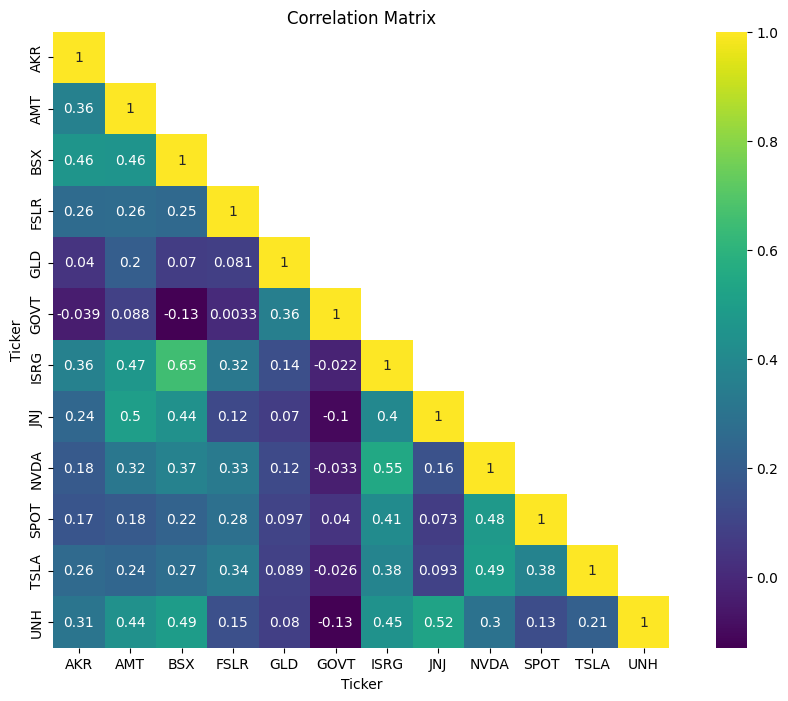

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation, dtype=bool), k=1)
sns.heatmap(correlation, annot=True, mask=mask, cmap='viridis', square=True)
plt.title("Correlation Matrix")
plt.show()

### Efficient Frontier - simulation

In [11]:
p_ret = []
p_vol = []
p_weights = []

num_assets = len(prices.columns)
num_portfolios = 10000

In [12]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, e_r)
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(252)
    p_vol.append(ann_sd)

In [13]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [14]:
for counter, symbol in enumerate(prices.columns.tolist()):
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [15]:
portfolios = pd.DataFrame(data)
portfolios

,Returns,Volatility,AKR weight,AMT weight,BSX weight,FSLR weight,GLD weight,GOVT weight,ISRG weight,JNJ weight,NVDA weight,SPOT weight,TSLA weight,UNH weight
0,0.158484,0.215569,0.095259,0.082580,0.011060,0.117047,0.006127,0.130802,0.075736,0.114486,0.000756,0.154976,0.082536,0.128635
1,0.209665,0.246872,0.084731,0.042425,0.126123,0.059954,0.027974,0.030500,0.107089,0.063930,0.022412,0.145696,0.136262,0.152903
2,0.246029,0.251085,0.123295,0.010437,0.125412,0.037336,0.003921,0.112034,0.136403,0.003450,0.143795,0.067247,0.103442,0.133228
3,0.209690,0.219609,0.141124,0.000924,0.002618,0.116148,0.064720,0.162883,0.065459,0.100436,0.131659,0.108082,0.058317,0.047628
4,0.180032,0.198072,0.019620,0.113979,0.071125,0.084412,0.113542,0.107139,0.113218,0.087180,0.038085,0.063032,0.089591,0.099077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.213158,0.221282,0.026931,0.086625,0.081653,0.099097,0.130304,0.032603,0.089893,0.121303,0.073931,0.121353,0.089583,0.046724
9996,0.189195,0.227238,0.036018,0.095083,0.104265,0.137885,0.076692,0.082487,0.049907,0.120186,0.009330,0.116210,0.143341,0.028596
9997,0.182896,0.222314,0.093510,0.124441,0.031972,0.119236,0.091661,0.064077,0.114711,0.072285,0.036137,0.062030,0.103359,0.086581
9998,0.167637,0.213560,0.138232,0.002475,0.107871,0.108277,0.023390,0.096626,0.031170,0.165154,0.008076,0.083499,0.111694,0.123536


<Axes: xlabel='Volatility', ylabel='Returns'>

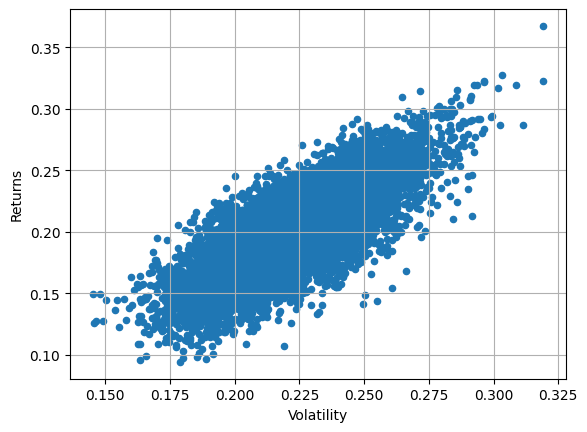

In [16]:
portfolios.plot.scatter(x='Volatility', y='Returns', grid=True)

# Global Minimum Variance Portfolio

In [17]:
portfolios[portfolios['Volatility']==portfolios['Volatility'].min()]

,Returns,Volatility,AKR weight,AMT weight,BSX weight,FSLR weight,GLD weight,GOVT weight,ISRG weight,JNJ weight,NVDA weight,SPOT weight,TSLA weight,UNH weight
9551,0.149445,0.145057,0.031914,0.097691,0.002019,0.030329,0.292261,0.138249,0.030337,0.094397,0.066681,0.021174,0.021277,0.173672


In [18]:
min_var_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
print("Minimum variance portfolio:"),min_var_port

Minimum variance portfolio:


(None,
 Returns        0.149445
 Volatility     0.145057
 AKR weight     0.031914
 AMT weight     0.097691
 BSX weight     0.002019
 FSLR weight    0.030329
 GLD weight     0.292261
 GOVT weight    0.138249
 ISRG weight    0.030337
 JNJ weight     0.094397
 NVDA weight    0.066681
 SPOT weight    0.021174
 TSLA weight    0.021277
 UNH weight     0.173672
 Name: 9551, dtype: float64)

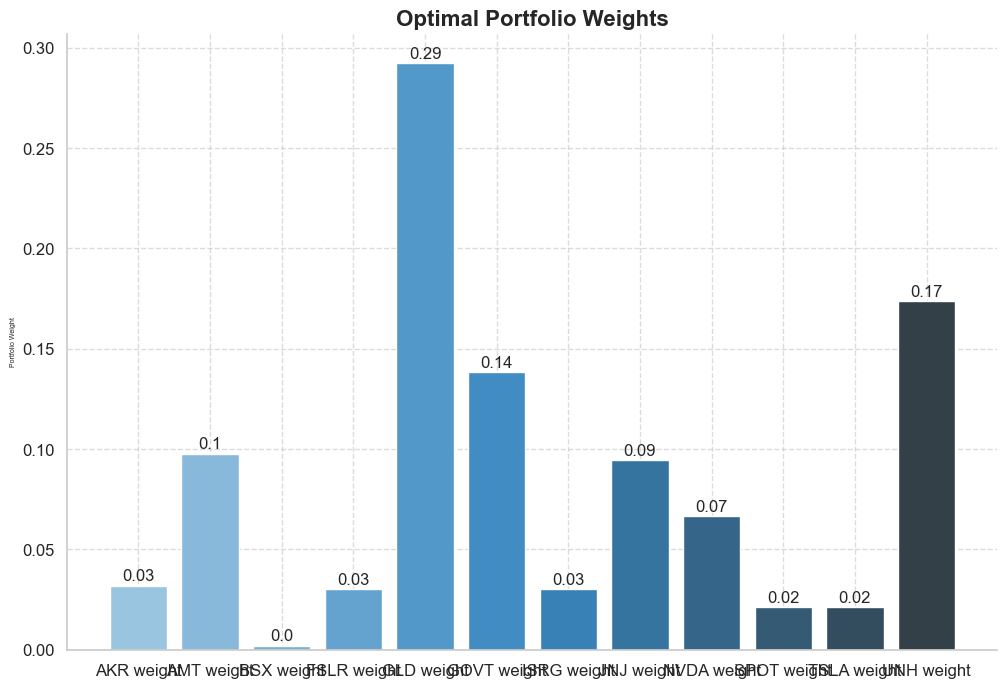

In [38]:
sns.set(style='whitegrid')
weights = min_var_port.drop(['Returns', 'Volatility'])

plt.figure(figsize=(12, 8))
bars = plt.bar(weights.index, weights, color=sns.color_palette("Blues_d", len(weights)))

plt.title('Optimal Portfolio Weights', fontsize=16, fontweight='bold')
plt.ylabel('Portfolio Weight', fontsize=5)
plt.grid(True, linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 2), ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


C:\Users\jedre\AppData\Local\Temp\ipykernel_22176\4232856658.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_var_port[1], min_var_port[0], color='red', label='Minimum Variance Portfolio')


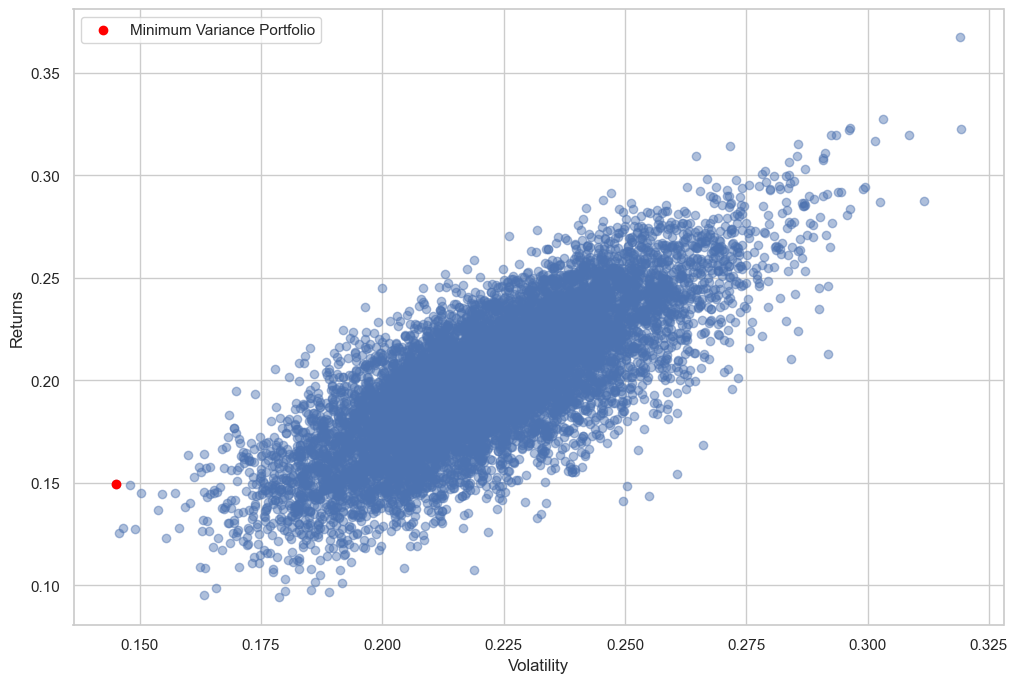

In [20]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,8))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], alpha=0.45)
plt.scatter(min_var_port[1], min_var_port[0], color='red', label='Minimum Variance Portfolio')

plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Returns')

plt.show()

# Max Sharpe Ratio Portfolio

In [21]:
rf = 0.0418

In [22]:
sharpe_ratios = (portfolios['Returns'] - rf) / portfolios['Volatility']

max_sharpe_index = sharpe_ratios.idxmax()

max_sharpe_ratio = sharpe_ratios[max_sharpe_index]

print((f'Maximum Sharpe Ratio: {max_sharpe_ratio}'))

Maximum Sharpe Ratio: 1.0202878785457485


In [23]:
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
print("Maximum Sharpe ratio portfolio:"), 
optimal_risky_port

Maximum Sharpe ratio portfolio:


Returns        0.367421
Volatility     0.319146
AKR weight     0.007557
AMT weight     0.014539
BSX weight     0.162492
FSLR weight    0.050560
GLD weight     0.011693
GOVT weight    0.020590
ISRG weight    0.051266
JNJ weight     0.032271
NVDA weight    0.268560
SPOT weight    0.085869
TSLA weight    0.195053
UNH weight     0.099551
Name: 9687, dtype: float64

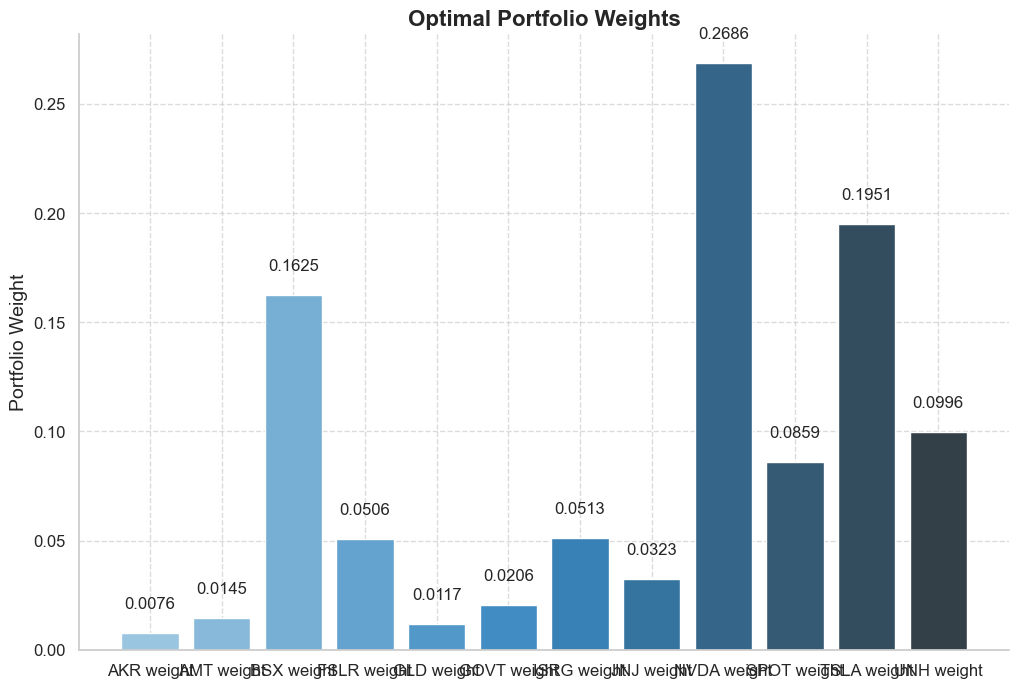

In [24]:
sns.set(style='whitegrid')
weights_risky_port = optimal_risky_port.drop(['Returns', 'Volatility'])

plt.figure(figsize=(12, 8))
bars = plt.bar(weights_risky_port.index, weights_risky_port, color=sns.color_palette("Blues_d", len(weights_risky_port)))

plt.title('Optimal Portfolio Weights', fontsize=16, fontweight='bold')
plt.ylabel('Portfolio Weight', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.show()


C:\Users\jedre\AppData\Local\Temp\ipykernel_22176\606307182.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(min_var_port[1], min_var_port[0], color='red', label='Minimum Variance Portfolio')
C:\Users\jedre\AppData\Local\Temp\ipykernel_22176\606307182.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', label = 'Tangency Portfolio')


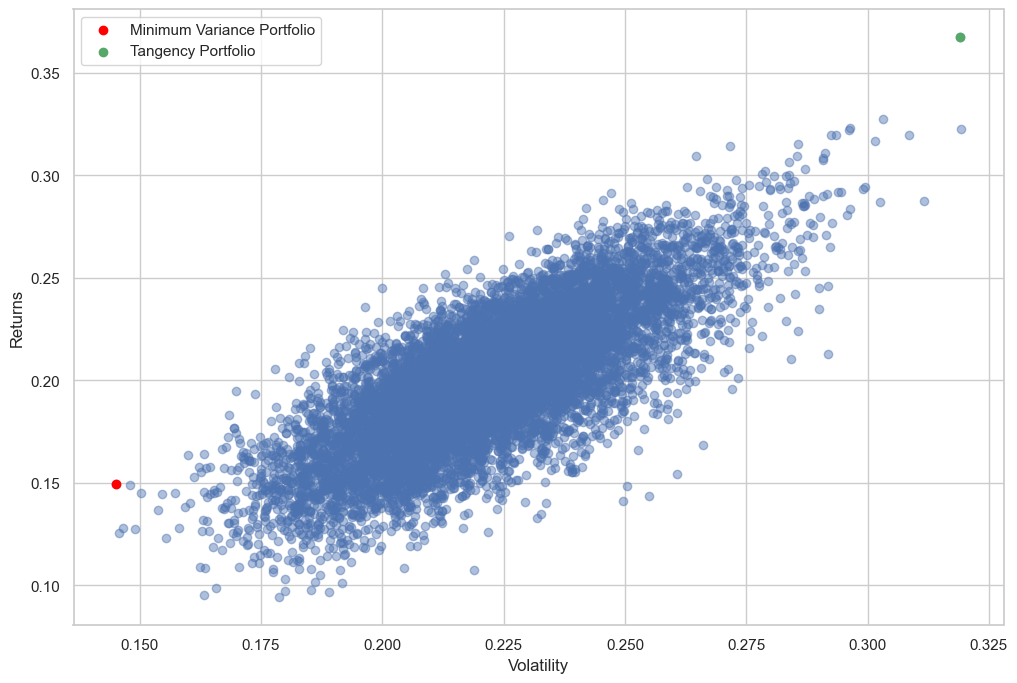

In [25]:
plt.subplots(figsize=(12,8))
plt.scatter(portfolios['Volatility'], portfolios['Returns'], alpha=0.45)
plt.scatter(min_var_port[1], min_var_port[0], color='red', label='Minimum Variance Portfolio')
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', label = 'Tangency Portfolio')

plt.legend()
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

### Cash Allocation (highest Sharpe ratio) - how many shares to buy?

In [26]:

weights_risky_port = optimal_risky_port[2:].to_dict()

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(prices)
DA = DiscreteAllocation(weights_risky_port, latest_prices, total_portfolio_value= 900_000)
allocation, leftover = DA.lp_portfolio()

tickers = [ticker.replace(' weight', '') for ticker in allocation.keys()]
shares = list(allocation.values())
data = {'Ticker': tickers, 'Nr of shares': shares}
df_allocation = pd.DataFrame(data)

df_allocation

,Ticker,Nr of shares
0,AKR,289
1,AMT,59
2,BSX,1661
3,FSLR,232
4,GLD,42
5,GOVT,810
6,ISRG,89
7,JNJ,179
8,NVDA,1682
9,SPOT,202


In [27]:
print(f"Cash left: {leftover}")

Cash left: 182.66379467223305
